In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
from google.colab import files
dataset=files.upload()

Saving IR_trans_bmp_image.zip to IR_trans_bmp_image.zip


In [3]:
!unzip /content/IR_trans_bmp_image.zip



Archive:  /content/IR_trans_bmp_image.zip
  inflating: IR_trans_bmp/p1001.bmp  
  inflating: IR_trans_bmp/p1002.bmp  
  inflating: IR_trans_bmp/p1003.bmp  
  inflating: IR_trans_bmp/p1004.bmp  
  inflating: IR_trans_bmp/p1005.bmp  
  inflating: IR_trans_bmp/p1006.bmp  
  inflating: IR_trans_bmp/p1007.bmp  
  inflating: IR_trans_bmp/p1008.bmp  
  inflating: IR_trans_bmp/p1009.bmp  
  inflating: IR_trans_bmp/p1010.bmp  
  inflating: IR_trans_bmp/p1011.bmp  
  inflating: IR_trans_bmp/p1012.bmp  
  inflating: IR_trans_bmp/p1013.bmp  
  inflating: IR_trans_bmp/p1014.bmp  
  inflating: IR_trans_bmp/p1015.bmp  
  inflating: IR_trans_bmp/p1016.bmp  
  inflating: IR_trans_bmp/p1017.bmp  
  inflating: IR_trans_bmp/p1018.bmp  
  inflating: IR_trans_bmp/p1019.bmp  
  inflating: IR_trans_bmp/p1020.bmp  
  inflating: IR_trans_bmp/p1021.bmp  
  inflating: IR_trans_bmp/p1022.bmp  
  inflating: IR_trans_bmp/p2001.bmp  
  inflating: IR_trans_bmp/p2002.bmp  
  inflating: IR_trans_bmp/p2003.bmp  
  inflat

In [4]:

image_folder = "/content/IR_trans_bmp"

all_images = [
    os.path.join(image_folder, file_name)
    for file_name in os.listdir(image_folder)
    if file_name.lower().endswith(('bmp'))
]

print("Total images found:", len(all_images))
print("Sample image paths:", all_images[:5])


Total images found: 255
Sample image paths: ['/content/IR_trans_bmp/p8071.bmp', '/content/IR_trans_bmp/p5042.bmp', '/content/IR_trans_bmp/p2019.bmp', '/content/IR_trans_bmp/p5028.bmp', '/content/IR_trans_bmp/p2024.bmp']


In [ ]:
Visualizing the images samples and observing different working conditions

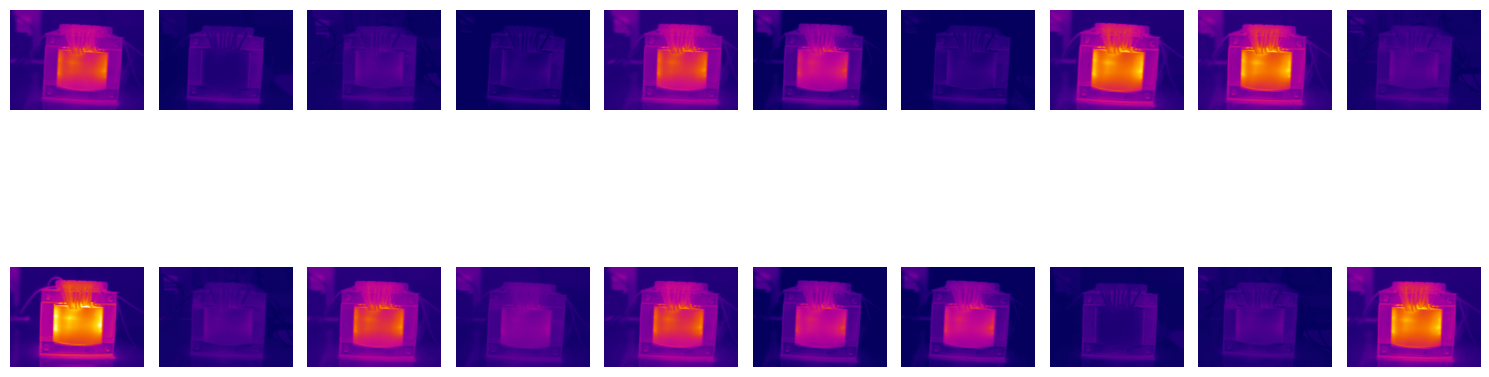

In [5]:
import random
import cv2
import matplotlib.pyplot as plt

if all_images:
    sample_paths = random.sample(all_images, min(20, len(all_images)))
    plt.figure(figsize=(15,7))
    for i, img_path in enumerate(sample_paths, 1):
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        plt.subplot(2, 10, i)
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images found in the folder.")

In [ ]:
APPLY FEATURE EXTERACTION: Edge Detection , Hotspot Detection with thresholding respectively and then combine and concatenate them

In [6]:

def preprocess_image(img_path, size=(224, 224)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)

    # Feature Extraction: Edge Detection
    edges = cv2.Canny(img, 100, 200)

    # Hotspot Detection: Thresholding
    _, hotspots = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

    # Combine features
    combined = cv2.addWeighted(edges, 0.5, hotspots, 0.5, 0)

    img = combined / 255.0  # Normalize
    return img.reshape(*size, 1)


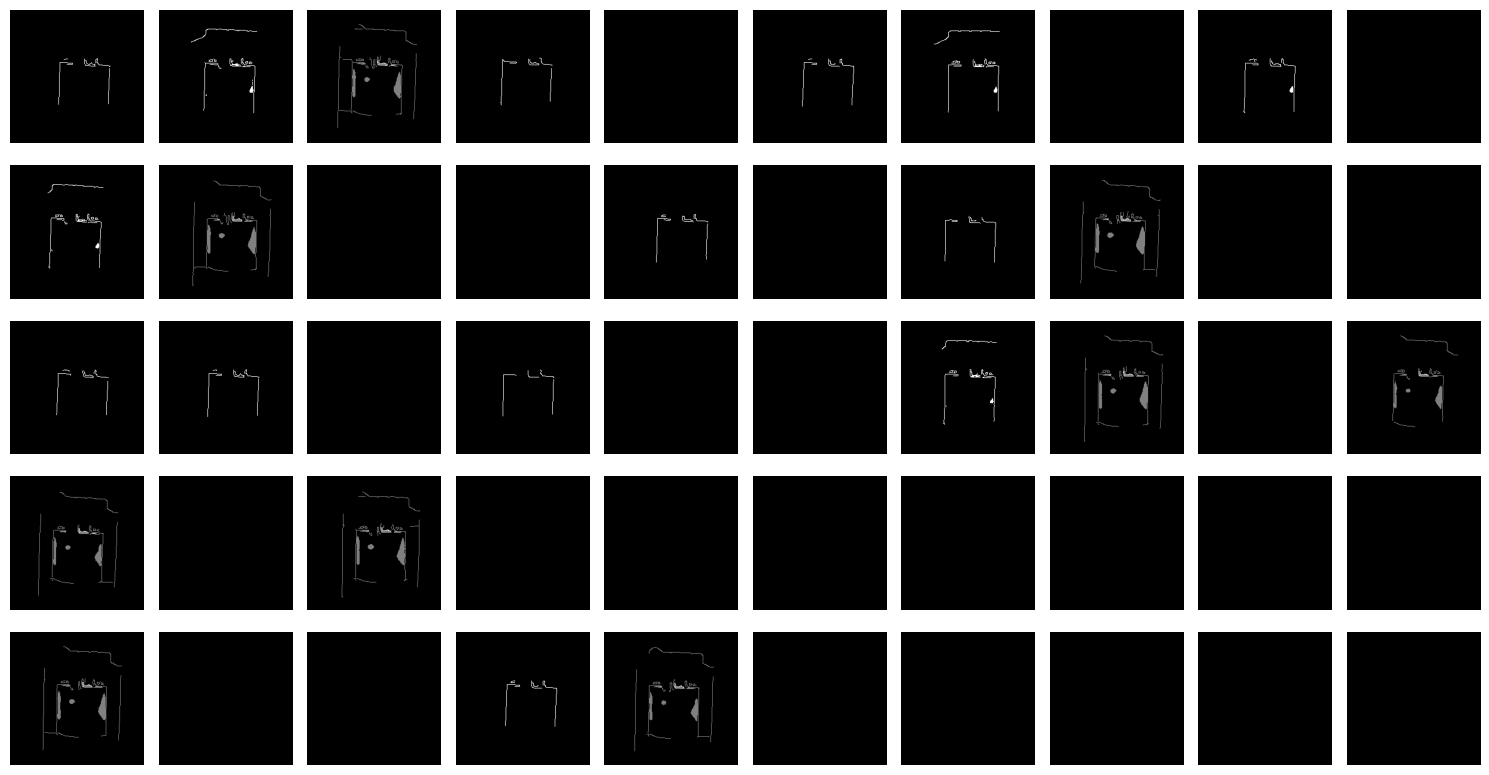

In [16]:
import matplotlib.pyplot as plt
import random
sample_images = random.sample(all_images, 50)

plt.figure(figsize=(15, 8))

for i, img_path in enumerate(sample_images, 1):
    img_array = preprocess_image(img_path)
    plt.subplot(5, 10, i)
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
def detect_and_draw_hotspots(original_img, threshold=200):
    # Thresholding to detect hotspots
    _, thresh = cv2.threshold(original_img, threshold, 255, cv2.THRESH_BINARY)

    # Find contours of hotspots
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes on the original image
    img_color = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_color, (x, y), (x+w, y+h), (0, 0, 255), 2)  # Red box

    return img_color


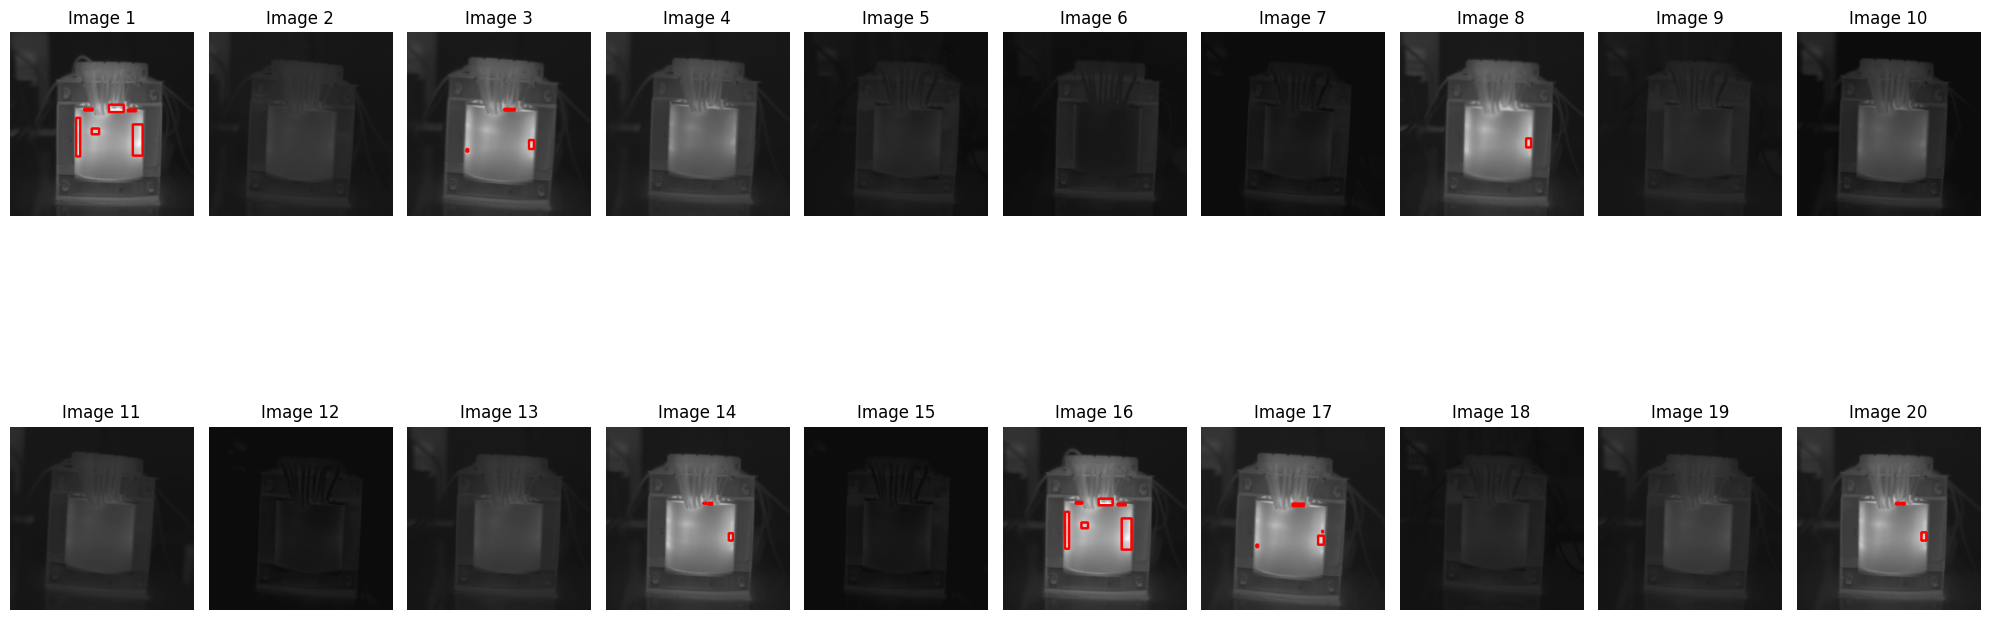

In [11]:
import matplotlib.pyplot as plt
import random

# Select 5 random images from all_images
sample_images = random.sample(all_images, 20)

plt.figure(figsize=(20, 10))

for i, img_path in enumerate(sample_images, 1):
    # Load original grayscale image
    original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (224, 224))

    # Detect and draw hotspots
    img_with_boxes = detect_and_draw_hotspots(original_img)

    # Plot the image
    plt.subplot(2, 10, i)
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Image {i}')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np

def preprocess_image(img_path, size=(224, 224)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    img = img / 255.0  # Normalize
    return img.reshape(*size, 1)

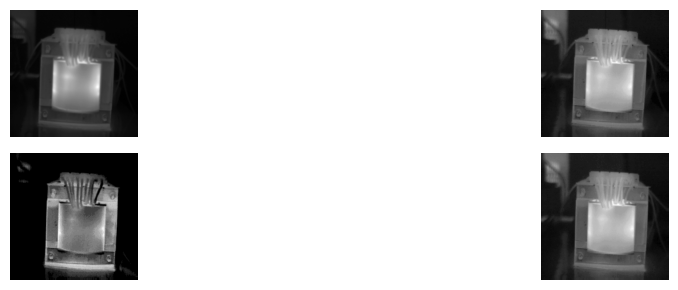

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
for i in range(4):
    img_array = preprocess_image(all_images[i])
    plt.subplot(2,2 , i+1)
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

This cell is final preprocessing steps including importing data again convert to grayscale and convert it to PIL format which is readable and undrestandable for torch

In [ ]:
class ThermalDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        # Load image in grayscale
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image not found or unable to read: {img_path}")
        # Resize image
        image = cv2.resize(image, (224, 224))
        # Convert to PIL Image for torchvision transforms
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        return image


In [ ]:
from PIL import Image

# Path to your single image folder
image_folder = "/content/IR_trans_bmp"

# Get all image file paths including .bmp
all_images = [
    os.path.join(image_folder, file_name)
    for file_name in os.listdir(image_folder)
    if file_name.lower().endswith(( '.bmp'))
]

print("Total images found:", len(all_images))
print("Sample image paths:", all_images[:5])

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Create Dataset and DataLoader
dataset = ThermalDataset(all_images, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


Total images found: 255
Sample image paths: ['/content/IR_trans_bmp/p8071.bmp', '/content/IR_trans_bmp/p5042.bmp', '/content/IR_trans_bmp/p2019.bmp', '/content/IR_trans_bmp/p5028.bmp', '/content/IR_trans_bmp/p2024.bmp']


The Autoencoder network execute dimention reduction and changine size of image from 224 to 112 ( from one gray image extracted 16 features and stride step is 2) then from 112, size converted to 56 and from 56 converted to 28 and consequently the features increased

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # [16, 112, 112]
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # [32, 56, 56]
            nn.ReLU(True),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # [64, 28, 28]
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # [32, 56, 56]
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # [16, 112, 112]
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # [1, 224, 224]
            nn.Sigmoid()  # To ensure output is between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


the MSE loss function applied because normaly this loss function which computes difference and distance between input and putput, uses for autoencoder

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in dataloader:
        img = data.to(device)
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * img.size(0)
    epoch_loss = running_loss / len(dataloader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/20], Loss: 1.2470
Epoch [2/20], Loss: 0.6276
Epoch [3/20], Loss: 0.5416
Epoch [4/20], Loss: 0.5405
Epoch [5/20], Loss: 0.5379
Epoch [6/20], Loss: 0.5361
Epoch [7/20], Loss: 0.5356
Epoch [8/20], Loss: 0.5353
Epoch [9/20], Loss: 0.5336
Epoch [10/20], Loss: 0.5333
Epoch [11/20], Loss: 0.5332
Epoch [12/20], Loss: 0.5332
Epoch [13/20], Loss: 0.5331
Epoch [14/20], Loss: 0.5331
Epoch [15/20], Loss: 0.5330
Epoch [16/20], Loss: 0.5330
Epoch [17/20], Loss: 0.5329
Epoch [18/20], Loss: 0.5329
Epoch [19/20], Loss: 0.5329
Epoch [20/20], Loss: 0.5329


In [ ]:
model.eval()
reconstruction_errors = []
with torch.no_grad():
    for data in dataloader:
        img = data.to(device)
        output = model(img)
        loss = torch.mean((output - img) ** 2, dim=[1,2,3])
        reconstruction_errors.extend(loss.cpu().numpy())

# Convert to NumPy array
reconstruction_errors = np.array(reconstruction_errors)
print(reconstruction_errors.shape  )

(255,)


In [ ]:
threshold = np.percentile(reconstruction_errors, 75)
print(f"Reconstruction error threshold: {threshold}")

# Identify anomalies
anomaly_indices = np.where(reconstruction_errors > threshold)[0]
anomalous_images = [all_images[i] for i in anomaly_indices]

print(f"Number of anomalies detected: {len(anomalous_images)}")

Reconstruction error threshold: 0.6508393585681915
Number of anomalies detected: 64


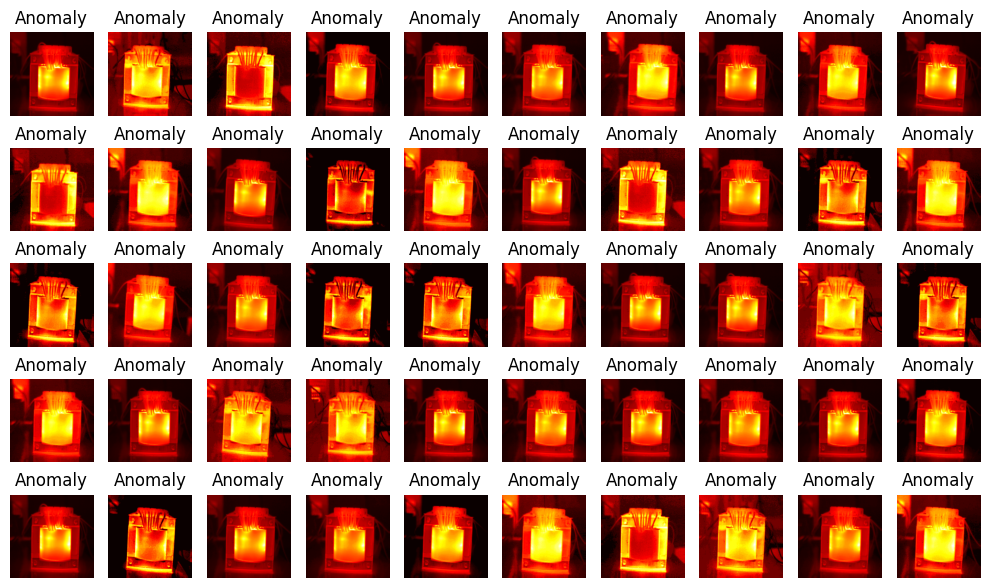

In [ ]:
if anomalous_images:
    sample_anomalies = random.sample(anomalous_images, min(50, len(anomalous_images)))

    plt.figure(figsize=(10, 6))
    for i, img_path in enumerate(sample_anomalies, 1):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        plt.subplot(5,10, i)
        plt.imshow(img, cmap='hot')
        plt.title("Anomaly")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No anomalies detected.")